Matplotlib [tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

In [68]:
import numpy as np
import scipy.interpolate as intp
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [69]:
im = Image.open("dna_part.pgm")

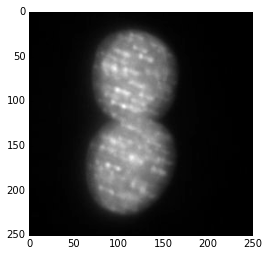

In [70]:
pix = np.array(im)
plt.gray()
plt.imshow(pix)

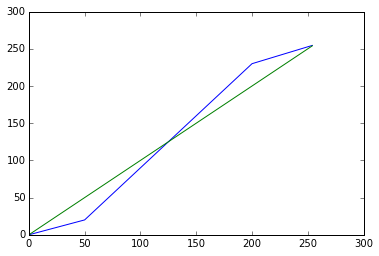

In [120]:
y = [0, 20, 230, 255]
x = [0, 50, 200, 255]

f = intp.interp1d(x, y)
z = f([i for i in range(255)])
plt.plot(z)
plt.plot([i for i in range(255)])

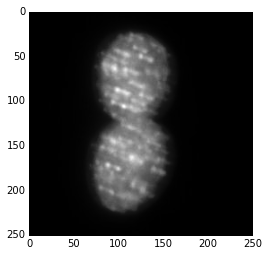

In [121]:
cpix = f(pix)
plt.imshow(cpix)

In [91]:
diff = cpix - pix
print(diff.min(), diff.max())
diff = diff + np.abs(diff.min())

-30.0 24.0


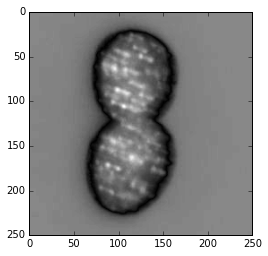

In [92]:
plt.imshow(diff)

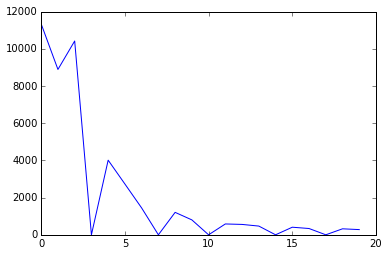

In [102]:
hist_pix = np.histogram(pix.flatten(), 255)
hist_cpix = np.histogram(cpix.flatten(), 255)

plt.plot(hist_pix[0][0:20])

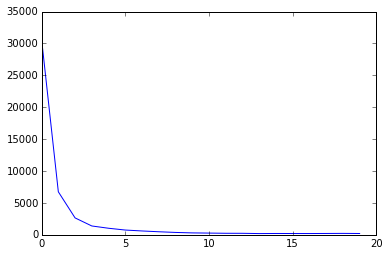

In [103]:
plt.plot(hist_cpix[0][0:20])

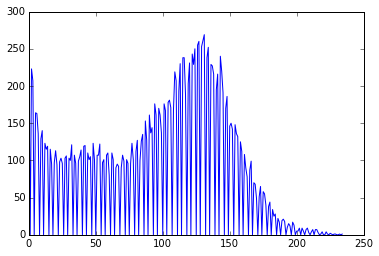

In [104]:
plt.plot(hist_pix[0][20:255])

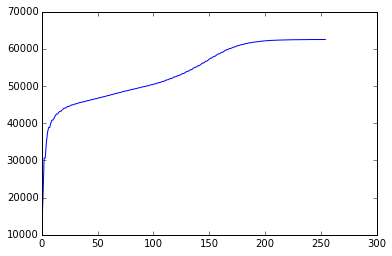

In [105]:
cdf_pix = hist_pix[0].cumsum()
plt.plot(cdf_pix)

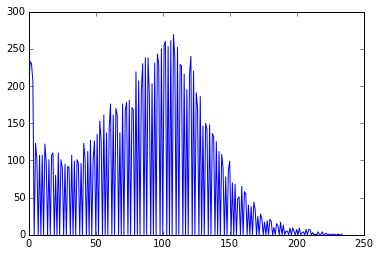

In [106]:
plt.plot(hist_cpix[0][20:255])

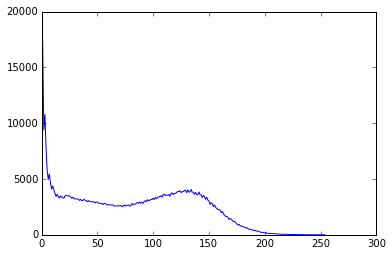

In [107]:
cdf_cpix = hist_cpix[0].cumsum()
plt.plot(cdf_cpix - cdf_pix)

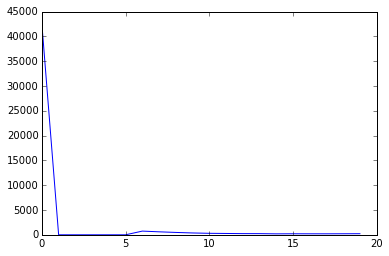

In [108]:
cpix[cpix < 5] = 0
hist_cpix = np.histogram(cpix.flatten(), 255)
plt.plot(hist_cpix[0][0:20])

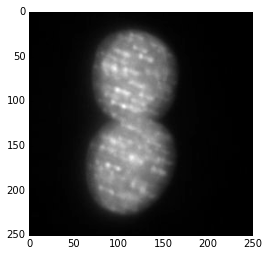

In [109]:

plt.imshow(pix)

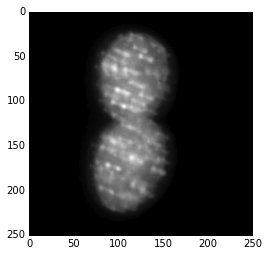

In [110]:
plt.imshow(cpix)

In [111]:
import kernels3x3 as k33
import numpy

In [112]:
pix_buffer = numpy.copy(cpix)

pix_filter = k33.calc(cpix, func=k33.kernel_update, args = (k33.gaussian, k33.norm_gaussian,))

pix_sharp = pix_buffer + 0.4 * (pix_buffer - pix_filter)

args (array([[1, 2, 1],
       [2, 4, 2],
       [1, 2, 1]]), 16)
norm 16


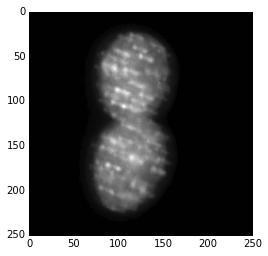

In [113]:
plt.imshow(pix_sharp)

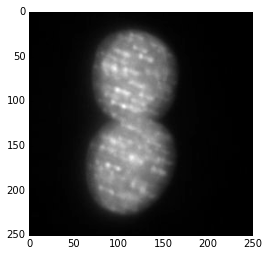

In [114]:
plt.imshow(pix)